In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet 





## Extract the Data

In [11]:
# Read Resources/Macrotrends-gold-prices-daily.csv into a dataframe
gold_prices_df = pd.read_csv('Resources/Macrotrends-gold-prices-daily.csv')
display(gold_prices_df.head())
display(gold_prices_df.tail())
display(gold_prices_df.dtypes)
display(gold_prices_df.describe())
display(gold_prices_df.shape)





,Date,Closing Value
0,1968-04-01,38.0
1,1968-04-02,37.6
2,1968-04-03,37.7
3,1968-04-04,36.7
4,1968-04-05,37.2


,Date,Closing Value
14124,2023-12-21,2045.9144
14125,2023-12-22,2053.2469
14126,2023-12-25,2054.4562
14127,2023-12-26,2067.8311
14128,2023-12-27,2070.2755


Date              object
Closing Value    float64
dtype: object

,Closing Value
count,14129.000000
mean,631.404530
std,544.464614
min,34.780000
25%,287.000000
50%,387.150000
75%,1094.250000
max,2115.100000


(14129, 2)

## Visualize the Data

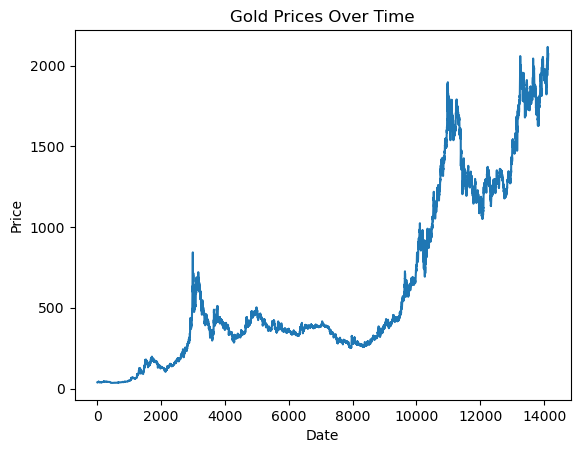

In [13]:
# Code for initial visualization of the gold prices data
plt.plot(gold_prices_df.index, gold_prices_df['Closing Value'])
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()




## Cleanse the Data for Prophet

In [14]:
# Code to cleanse and prepare the data for Prophet
gold_prices_df = gold_prices_df.reset_index()
gold_prices_df = gold_prices_df.rename(columns = {'Date':'ds', 'Closing Value':'y'})
gold_prices_df = gold_prices_df[['ds','y']]
print(gold_prices_df)



               ds          y
0      1968-04-01    38.0000
1      1968-04-02    37.6000
2      1968-04-03    37.7000
3      1968-04-04    36.7000
4      1968-04-05    37.2000
...           ...        ...
14124  2023-12-21  2045.9144
14125  2023-12-22  2053.2469
14126  2023-12-25  2054.4562
14127  2023-12-26  2067.8311
14128  2023-12-27  2070.2755

[14129 rows x 2 columns]


## Visualizations and Predictions with Prophet

10:15:46 - cmdstanpy - INFO - Chain [1] start processing
10:15:56 - cmdstanpy - INFO - Chain [1] done processing


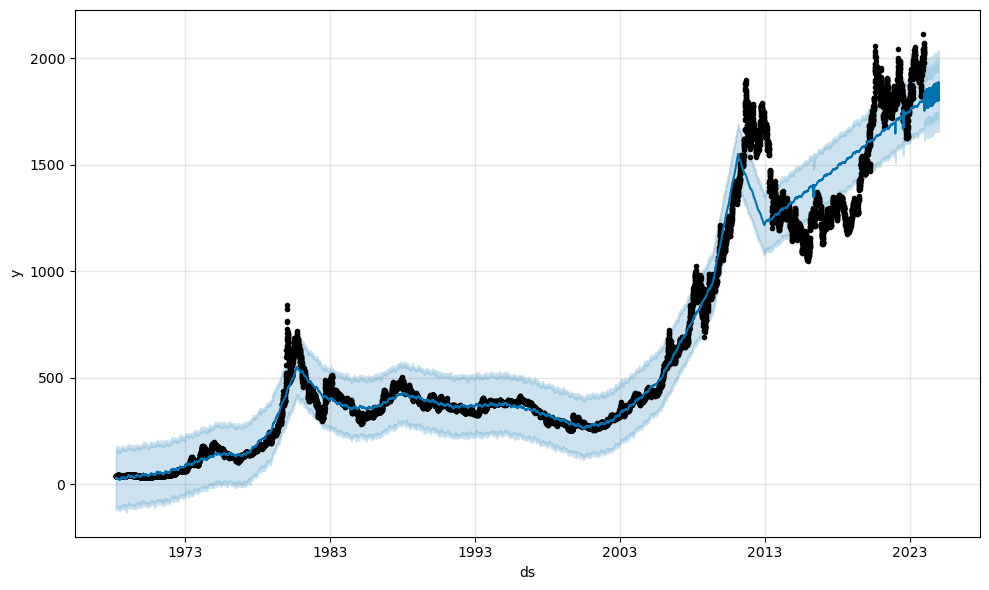

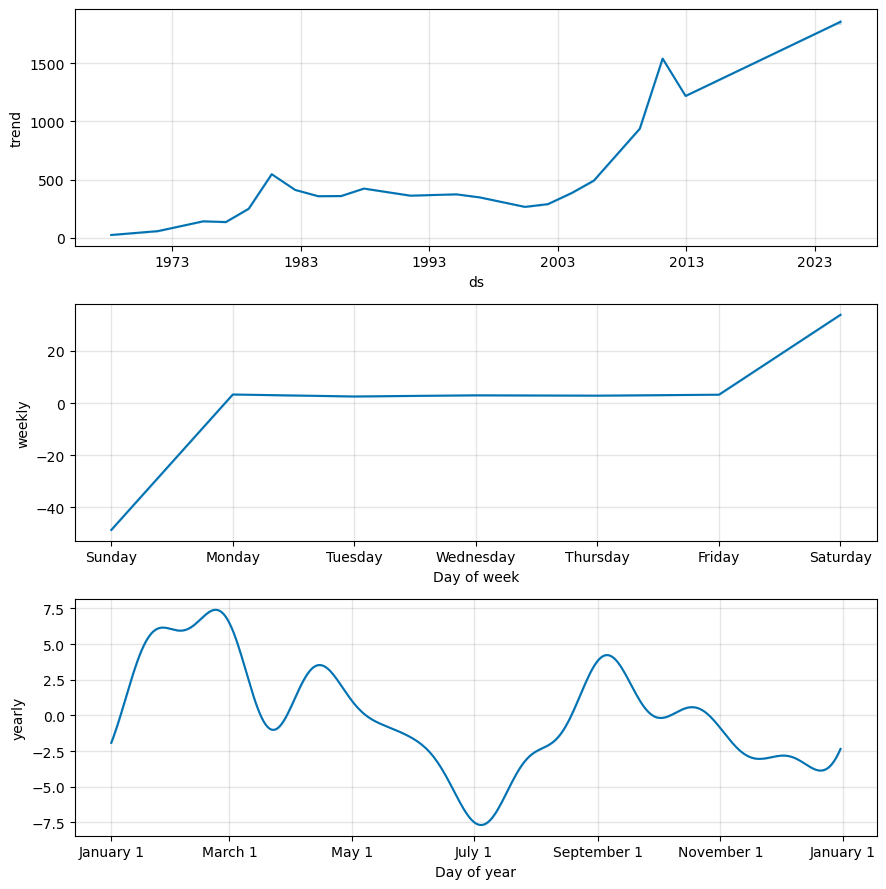

In [15]:
# Code for making predictions with Prophet and visualizing the results
m = Prophet()
m.fit(gold_prices_df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
plt.show()



## Extract the Cleansed Data into a CSV

In [16]:
# Code to export the cleansed data to a CSV file
gold_prices_df.to_csv('Resources/gold_prices_clean.csv', index=False)